**Data Science and Business Analytics Internship**

**Task #2 Prediction Using Supervised Machine Learning**

**Name - Bhanu Marwah**



**Linear Regression**

When there is a linear relationship between the dependent and independent variables and we want to predict the dependent variable using that relationship.

Here, it is simple linear regression model where we will predict the percentage of marks that a student is expected to score based upon the number of hours he/she has studied. 

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# reading the dataset 
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


First of all, we need to find out the relationship between both the variables - Hours and Scores.

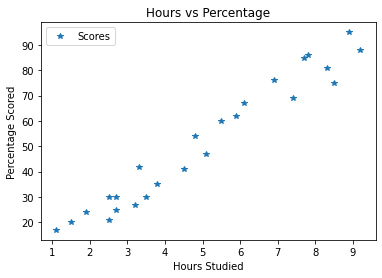

In [ ]:
# plotting the variables 
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

**We can clearly see that there is a linear relationship between no. of hours studied and percentage scored.**

Segregating the dataset into dependent and independent variables

In [ ]:
x = data.iloc[:, :-1].values  # independent variables is hours studied 
y = data.iloc[:, 1].values    # dependent variable is percentage scored

Splitting the dataset into train ans test sets

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 


Training the model

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()   # initialize the model 
regressor.fit(x_train, y_train)  # fitting the train set

LinearRegression()

**Regression Line** - It is a straight line that attempts to predict the relationship between two variables. 

The equation of the line is - y = a*x + b where a is the slope of the line and b is the intercept.

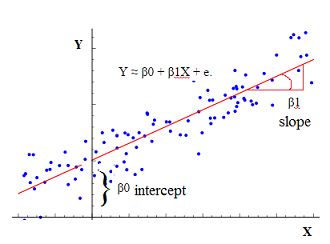

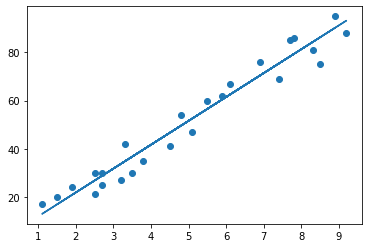

In [ ]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_
 # here, a = regressor coefficient and  b is regressor intercept
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

Making predictions on the test set

In [ ]:
y_pred = regressor.predict(x_test) # Predicting the scores

Comparing Actual and Predicted Values

In [ ]:
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_data.head() 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Our main question was - **What will be the predicted score if the student studies for 9.25 hours a day?**

So, Now we will predict the percentage scored using our own value for Hours.

In [ ]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


Evaluating the Model - Since, here we are dealing with numric data so we can use mean square error as our evaluation metric. 

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
print('Mean Absolute Error:', MAE(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
